In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeRegressor #a single decision tree
from sklearn.ensemble import RandomForestRegressor #random forest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt

df = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
df.Price

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [3]:
df_2 = df.copy()

In [4]:
# Imputation
my_imputer = SimpleImputer()

numerical_transformer = pd.DataFrame(my_imputer.fit_transform(df_2.select_dtypes(include=['int64','float64'])))
numerical_transformer.columns = df_2.select_dtypes(include=['int64','float64']).columns

df_3 = numerical_transformer.join(df_2.select_dtypes(include=['object']))
df_3

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,144.99840,4019.0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,144.99340,4019.0,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,144.99440,4019.0,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,144.99690,4019.0,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,144.99410,4019.0,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4.0,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,...,145.16761,7392.0,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,NaN,South-Eastern Metropolitan
13576,3.0,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,...,144.87904,6380.0,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,NaN,Western Metropolitan
13577,3.0,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,...,144.88738,6380.0,Williamstown,83 Power St,h,S,Raine,26/08/2017,NaN,Western Metropolitan
13578,4.0,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,...,144.89299,6380.0,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,NaN,Western Metropolitan


In [5]:
X = df_3.copy()
y = X.pop("Price")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Address          1.433718
Suburb           0.401939
Postcode         0.322796
Rooms            0.221111
Bedroom2         0.209940
Distance         0.208797
Propertycount    0.203009
CouncilArea      0.197082
BuildingArea     0.190400
Type             0.181147
SellerG          0.167437
Longtitude       0.154879
Lattitude        0.147419
Landsize         0.145188
Bathroom         0.131688
Method           0.116597
Regionname       0.104766
YearBuilt        0.101841
Car              0.096624
Date             0.017762
Name: MI Scores, dtype: float64

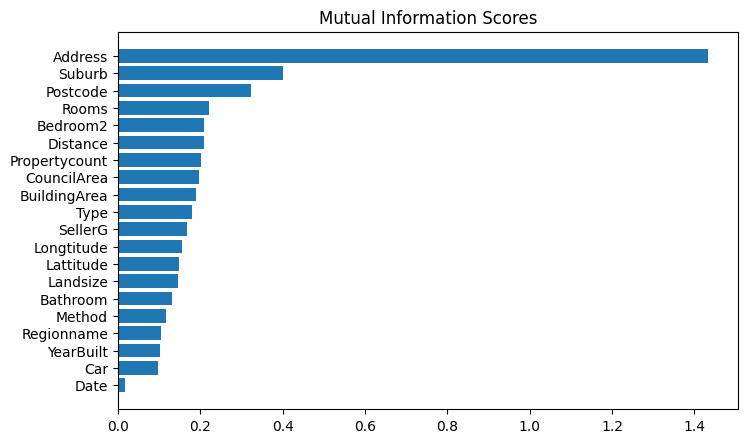

In [6]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [7]:
df_3.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
Lattitude           0
Longtitude          0
Propertycount       0
Suburb              0
Address             0
Type                0
Method              0
SellerG             0
Date                0
CouncilArea      1369
Regionname          0
dtype: int64

In [8]:
output = df_3.Price
# features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2','CouncilArea','Type','Propertycount','SellerG','Distance','Landsize','YearBuilt','Bathroom','Lattitude','Longtitude','Regionname','Method','Car','Date']
features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2','Type','Propertycount','SellerG','Distance','Landsize','YearBuilt','Bathroom','Lattitude','Longtitude','Regionname']
inputs = df_3[features]

inputs

,Address,BuildingArea,Suburb,Postcode,Rooms,Bedroom2,Type,Propertycount,SellerG,Distance,Landsize,YearBuilt,Bathroom,Lattitude,Longtitude,Regionname
0,85 Turner St,151.96765,Abbotsford,3067.0,2.0,2.0,h,4019.0,Biggin,2.5,202.0,1964.684217,1.0,-37.79960,144.99840,Northern Metropolitan
1,25 Bloomburg St,79.00000,Abbotsford,3067.0,2.0,2.0,h,4019.0,Biggin,2.5,156.0,1900.000000,1.0,-37.80790,144.99340,Northern Metropolitan
2,5 Charles St,150.00000,Abbotsford,3067.0,3.0,3.0,h,4019.0,Biggin,2.5,134.0,1900.000000,2.0,-37.80930,144.99440,Northern Metropolitan
3,40 Federation La,151.96765,Abbotsford,3067.0,3.0,3.0,h,4019.0,Biggin,2.5,94.0,1964.684217,2.0,-37.79690,144.99690,Northern Metropolitan
4,55a Park St,142.00000,Abbotsford,3067.0,4.0,3.0,h,4019.0,Nelson,2.5,120.0,2014.000000,1.0,-37.80720,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,12 Strada Cr,151.96765,Wheelers Hill,3150.0,4.0,4.0,h,7392.0,Barry,16.7,652.0,1981.000000,2.0,-37.90562,145.16761,South-Eastern Metropolitan
13576,77 Merrett Dr,133.00000,Williamstown,3016.0,3.0,3.0,h,6380.0,Williams,6.8,333.0,1995.000000,2.0,-37.85927,144.87904,Western Metropolitan
13577,83 Power St,151.96765,Williamstown,3016.0,3.0,3.0,h,6380.0,Raine,6.8,436.0,1997.000000,2.0,-37.85274,144.88738,Western Metropolitan
13578,96 Verdon St,157.00000,Williamstown,3016.0,4.0,4.0,h,6380.0,Sweeney,6.8,866.0,1920.000000,1.0,-37.85908,144.89299,Western Metropolitan


In [9]:
inputs['Suburb'].nunique()

314

In [10]:
categorical_cols = [cname for cname in inputs.columns if inputs[cname].nunique() <= 314 and inputs[cname].dtype == "object"]
categorical_cols

['Suburb', 'Type', 'SellerG', 'Regionname']

In [11]:
ordinal_encoder = OrdinalEncoder()
input_enc = inputs.copy()
inputs[categorical_cols] = ordinal_encoder.fit_transform(input_enc[categorical_cols])
inputs

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Address,BuildingArea,Suburb,Postcode,Rooms,Bedroom2,Type,Propertycount,SellerG,Distance,Landsize,YearBuilt,Bathroom,Lattitude,Longtitude,Regionname
0,85 Turner St,151.96765,0.0,3067.0,2.0,2.0,0.0,4019.0,23.0,2.5,202.0,1964.684217,1.0,-37.79960,144.99840,2.0
1,25 Bloomburg St,79.00000,0.0,3067.0,2.0,2.0,0.0,4019.0,23.0,2.5,156.0,1900.000000,1.0,-37.80790,144.99340,2.0
2,5 Charles St,150.00000,0.0,3067.0,3.0,3.0,0.0,4019.0,23.0,2.5,134.0,1900.000000,2.0,-37.80930,144.99440,2.0
3,40 Federation La,151.96765,0.0,3067.0,3.0,3.0,0.0,4019.0,23.0,2.5,94.0,1964.684217,2.0,-37.79690,144.99690,2.0
4,55a Park St,142.00000,0.0,3067.0,4.0,3.0,0.0,4019.0,155.0,2.5,120.0,2014.000000,1.0,-37.80720,144.99410,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,12 Strada Cr,151.96765,302.0,3150.0,4.0,4.0,0.0,7392.0,16.0,16.7,652.0,1981.000000,2.0,-37.90562,145.16761,4.0
13576,77 Merrett Dr,133.00000,305.0,3016.0,3.0,3.0,0.0,6380.0,251.0,6.8,333.0,1995.000000,2.0,-37.85927,144.87904,6.0
13577,83 Power St,151.96765,305.0,3016.0,3.0,3.0,0.0,6380.0,194.0,6.8,436.0,1997.000000,2.0,-37.85274,144.88738,6.0
13578,96 Verdon St,157.00000,305.0,3016.0,4.0,4.0,0.0,6380.0,222.0,6.8,866.0,1920.000000,1.0,-37.85908,144.89299,6.0


In [12]:
#Address
print('null values:',inputs['Address'].isnull().sum())
print(inputs['Address'].value_counts())
inputs=pd.get_dummies(inputs, columns=['Address'])

null values: 0
36 Aberfeldie St    3
2 Bruce St          3
5 Charles St        3
53 William St       3
14 Arthur St        3
                   ..
16 Alleford St      1
2/1073 Centre Rd    1
14 Columbia St      1
21 Hardy Ct         1
6 Agnes St          1
Name: Address, Length: 13378, dtype: int64


In [13]:
inputs

,BuildingArea,Suburb,Postcode,Rooms,Bedroom2,Type,Propertycount,SellerG,Distance,Landsize,...,Address_9A Montgomery St,Address_9A Normanby St,Address_9A The Crossway,Address_9a Arden Ct,Address_9a Ballater St,Address_9a Elizabeth St,Address_9a Ivan Av,Address_9a Russell St,Address_9a The Crossway,Address_9b Stewart St
0,151.96765,0.0,3067.0,2.0,2.0,0.0,4019.0,23.0,2.5,202.0,...,0,0,0,0,0,0,0,0,0,0
1,79.00000,0.0,3067.0,2.0,2.0,0.0,4019.0,23.0,2.5,156.0,...,0,0,0,0,0,0,0,0,0,0
2,150.00000,0.0,3067.0,3.0,3.0,0.0,4019.0,23.0,2.5,134.0,...,0,0,0,0,0,0,0,0,0,0
3,151.96765,0.0,3067.0,3.0,3.0,0.0,4019.0,23.0,2.5,94.0,...,0,0,0,0,0,0,0,0,0,0
4,142.00000,0.0,3067.0,4.0,3.0,0.0,4019.0,155.0,2.5,120.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,151.96765,302.0,3150.0,4.0,4.0,0.0,7392.0,16.0,16.7,652.0,...,0,0,0,0,0,0,0,0,0,0
13576,133.00000,305.0,3016.0,3.0,3.0,0.0,6380.0,251.0,6.8,333.0,...,0,0,0,0,0,0,0,0,0,0
13577,151.96765,305.0,3016.0,3.0,3.0,0.0,6380.0,194.0,6.8,436.0,...,0,0,0,0,0,0,0,0,0,0
13578,157.00000,305.0,3016.0,4.0,4.0,0.0,6380.0,222.0,6.8,866.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def validate_model(inputs, output):
    train_X, test_X, train_y, test_y = train_test_split(inputs, output, random_state = 0,test_size=0.1)
    model = RandomForestRegressor(n_estimators=10, random_state=1)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    n_scores = -1 * cross_val_score(model,
                               train_X,
                               train_y,
                               scoring='neg_mean_absolute_error',
                               cv=cv,
                               n_jobs=-1,
                               error_score='raise')
    # report performance
    print("MAE scores:\n", n_scores)
    print('mean_absolute_error: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
validate_model(inputs, output)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


MAE scores:
 [164459.781003   162081.37386209 170103.32157665 171341.94405346
 178669.20177305 173316.32866885 177167.07288598 169081.70002728
 161867.40777414 168024.83363339 160898.62589261 177138.76191255
 168079.63136934 171034.50720131 175424.70821058 171831.01887616
 172993.89991817 170129.02313148 155349.0251773  173808.56492089
 159763.55453802 170923.47473426 176081.43333333 168600.62405892
 169585.3403437  168815.71108838 170827.12951835 169762.93246045
 165166.31642117 176092.3276323 ]
mean_absolute_error: 169613.986 (5525.669)


In [15]:
# random forest 
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=10, random_state=1)
    model.fit(train_X, train_y)
    predicted_home_prices = model.predict(val_X)
    MAE = mean_absolute_error(val_y, predicted_home_prices)
    return MAE

In [16]:
def my_model(train_X,train_y):
    train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state = 0)
    print("MAE : ")
    print(score_dataset(train_X, val_X, train_y, val_y))
